In [1]:
from keras.utils import to_categorical
from keras.preprocessing.image import load_img
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
import os
import pandas as pd
import numpy as np


In [2]:
TRAIN_DIR ='images/train'
TEST_DIR ='images/test'


In [3]:
def createdataframe(dir):
    image_paths = []
    labels = []
    for label in os.listdir(dir):
        label_path = os.path.join(dir, label)
        if not os.path.isdir(label_path):
            continue  # Skip if not a directory
        for imagename in os.listdir(label_path):
            image_path = os.path.join(label_path, imagename)
            if os.path.isfile(image_path):  # Only append if it's a file
                image_paths.append(image_path)
                labels.append(label)
        print(label, "completed")
    return image_paths, labels


In [4]:
train =pd.DataFrame()
train['image'],train['lable']=createdataframe(TRAIN_DIR)

angry completed
disgust completed
fear completed
happy completed
neutral completed
sad completed
surprise completed


In [5]:
test = pd.DataFrame()
test['image'], test['lable'] = createdataframe(TEST_DIR)


angry completed
disgust completed
fear completed
happy completed
neutral completed
sad completed
surprise completed
test completed


In [6]:
import os
print(os.path.exists("images/train"))  # Should print True if the folder exists


True


In [7]:
os.makedirs("images/train", exist_ok=True)
os.makedirs("images/test", exist_ok=True)


In [8]:
train =pd.DataFrame()
train['image '],train['lable']=createdataframe(TRAIN_DIR)

angry completed
disgust completed
fear completed
happy completed
neutral completed
sad completed
surprise completed


In [9]:
print(train)

                               image      lable
0            images/train\angry\0.jpg     angry
1            images/train\angry\1.jpg     angry
2           images/train\angry\10.jpg     angry
3        images/train\angry\10002.jpg     angry
4        images/train\angry\10016.jpg     angry
...                               ...       ...
28816  images/train\surprise\9969.jpg  surprise
28817  images/train\surprise\9985.jpg  surprise
28818  images/train\surprise\9990.jpg  surprise
28819  images/train\surprise\9992.jpg  surprise
28820  images/train\surprise\9996.jpg  surprise

[28821 rows x 2 columns]


In [10]:
train_paths, train_labels = createdataframe(TRAIN_DIR)
train_df = pd.DataFrame({'image': train_paths, 'label': train_labels})
print(train_df.head())


angry completed
disgust completed
fear completed
happy completed
neutral completed
sad completed
surprise completed
                          image  label
0      images/train\angry\0.jpg  angry
1      images/train\angry\1.jpg  angry
2     images/train\angry\10.jpg  angry
3  images/train\angry\10002.jpg  angry
4  images/train\angry\10016.jpg  angry


In [11]:
from tqdm.notebook import tqdm

In [12]:
from keras.preprocessing.image import load_img
import numpy as np
from tqdm import tqdm

def extract_features(images):
    features = []
    for image in tqdm(images):
        img = load_img(image, color_mode='grayscale', target_size=(48, 48))  # Corrected
        img = np.array(img)
        features.append(img)
    features = np.array(features)
    features = features.reshape(len(features), 48, 48, 1)
    return features


In [13]:
train['image'], train['lable'] = createdataframe(TRAIN_DIR)


angry completed
disgust completed
fear completed
happy completed
neutral completed
sad completed
surprise completed


In [14]:
train_features = extract_features(train['image'])


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 28821/28821 [02:01<00:00, 237.08it/s]


In [15]:
print(train.columns)


Index(['image ', 'lable', 'image'], dtype='object')


In [16]:
# Assuming TEST_DIR = 'images/test' is already defined
test = pd.DataFrame()
test['image'], test['lable'] = createdataframe(TEST_DIR)


angry completed
disgust completed
fear completed
happy completed
neutral completed
sad completed
surprise completed
test completed


In [17]:
test = pd.DataFrame()
test['image'], test['lable'] = createdataframe(TEST_DIR)


angry completed
disgust completed
fear completed
happy completed
neutral completed
sad completed
surprise completed
test completed


In [18]:
test_features = extract_features(test['image'])


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 7066/7066 [00:03<00:00, 2328.56it/s]


In [19]:
print(test.head())
print(len(test))


                         image  lable
0  images/test\angry\10052.jpg  angry
1  images/test\angry\10065.jpg  angry
2  images/test\angry\10079.jpg  angry
3  images/test\angry\10095.jpg  angry
4  images/test\angry\10121.jpg  angry
7066


In [20]:
x_train=train_features/255.0
x_test=test_features/255.0


In [22]:
!pip install scikit-learn



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [23]:
from sklearn.preprocessing import LabelEncoder

In [24]:
le=LabelEncoder()
le.fit(train['lable'])

LabelEncoder()

In [25]:
y_train = le.transform(train['lable'])
y_test = le.transform(test['lable'])

In [26]:
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train, num_classes=7)
y_test = to_categorical(y_test, num_classes=7)

In [27]:
from keras.models import Sequential
from keras.layers import Input, Conv2D, MaxPooling2D, Dropout, Flatten, Dense

model = Sequential()
model.add(Input(shape=(48, 48, 1)))  # Use Input layer first
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))

model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.4))

model.add(Conv2D(256, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.4))

model.add(Conv2D(512, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.4))

model.add(Conv2D(512, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.4))

# Flatten before fully connected layers
model.add(Flatten())

# Fully Connected Layers
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.4))

model.add(Dense(256, activation='relu'))
model.add(Dropout(0.3))

# Output Layer (replace `7` with actual number of classes if needed)
model.add(Dense(7, activation='softmax'))


In [28]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])



In [29]:
model.fit(x=x_train, y=y_train, batch_size=128, epochs=100, validation_data=(x_test, y_test))


Epoch 1/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 172s 754ms/step - accuracy: 0.2282 - loss: 1.8393 - val_accuracy: 0.2583 - val_loss: 1.8138
Epoch 2/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 172s 763ms/step - accuracy: 0.2484 - loss: 1.8150 - val_accuracy: 0.2613 - val_loss: 1.7525
Epoch 3/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 169s 746ms/step - accuracy: 0.2842 - loss: 1.7382 - val_accuracy: 0.3431 - val_loss: 1.6310
Epoch 4/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 171s 755ms/step - accuracy: 0.3406 - loss: 1.6397 - val_accuracy: 0.4314 - val_loss: 1.4703
Epoch 5/100
 10/226 ━━━━━━━━━━━━━━━━━━━━ 2:34 714ms/step - accuracy: 0.4169 - loss: 1.5217

KeyboardInterrupt: 

In [33]:
# Save model architecture to JSON (optional, still valid)
model_json = model.to_json()
with open("emotiondetector.json", "w") as json_file:
    json_file.write(model_json)

# Save the entire model in the recommended `.keras` format
model.save("emotiondetector.keras")


In [6]:
from keras.models import model_from_json
from keras.utils import load_img
import numpy as np

# Load model architecture from JSON file
json_file = open("emotiondetector.json", "r")
model_json = json_file.read()
json_file.close()

# Load the model from JSON
model = model_from_json(model_json)

# Load weights into the model
model.load_weights("emotiondetector.h5")

# Emotion labels
label = ['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']

# Define image preprocessing function
from keras.preprocessing.image import load_img, img_to_array
import numpy as np

def ef(image_path):
    img = load_img(image_path, color_mode='grayscale', target_size=(48, 48))
    feature = img_to_array(img)
    feature = feature.reshape(1, 48, 48, 1)  # batch, height, width, channel
    return feature / 255.0  # Normalize
# Normalize pixel values


Original image is of sad
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
Model prediction is neutral


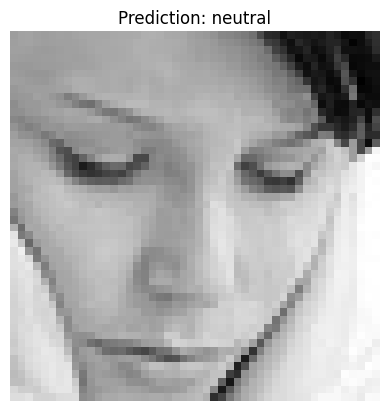

In [8]:
from keras.preprocessing.image import load_img, img_to_array

# Proper visualization version:
img_path = 'images/train/sad/42.jpg'
print("Original image is of sad")

# Preprocess for prediction
img = ef(img_path)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("Model prediction is", pred_label)

# Load and show image
img_display = load_img(img_path, color_mode='grayscale')
plt.imshow(img_display, cmap='gray')
plt.title(f"Prediction: {pred_label}")
plt.axis('off')
plt.show()


Original image is of happy
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step
Model prediction is happy


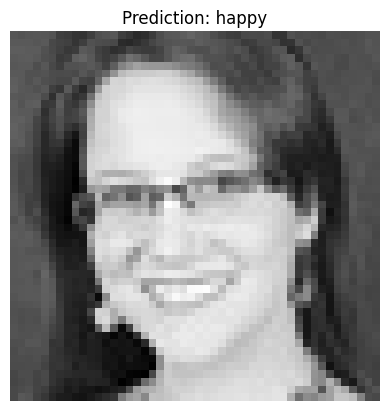

In [12]:
img_path = 'images/train/happy/7.jpg'
print("Original image is of happy")

img = ef(img_path)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("Model prediction is", pred_label)

# Display image
img_display = load_img(img_path, color_mode='grayscale')
plt.imshow(img_display, cmap='gray')
plt.title(f"Prediction: {pred_label}")
plt.axis('off')
plt.show()

Original image is of fear
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step
Model prediction is neutral


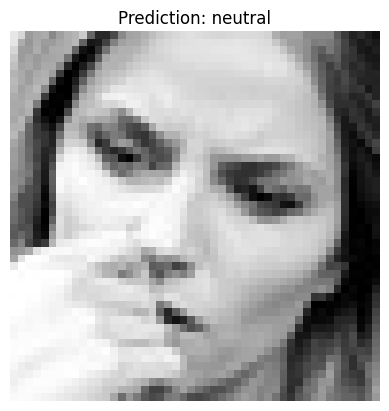

In [13]:
img_path = 'images/train/fear/2.jpg'
print("Original image is of fear")

img = ef(img_path)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("Model prediction is", pred_label)

# Display image
img_display = load_img(img_path, color_mode='grayscale')
plt.imshow(img_display, cmap='gray')
plt.title(f"Prediction: {pred_label}")
plt.axis('off')
plt.show()

Original image is of disgust
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
Model prediction is happy


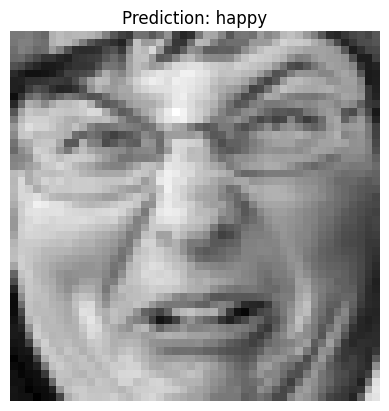

In [14]:
img_path = 'images/train/disgust/299.jpg'
print("Original image is of disgust")

img = ef(img_path)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("Model prediction is", pred_label)

# Display image
img_display = load_img(img_path, color_mode='grayscale')
plt.imshow(img_display, cmap='gray')
plt.title(f"Prediction: {pred_label}")
plt.axis('off')
plt.show()

Original image is of surprise
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
Model prediction is surprise


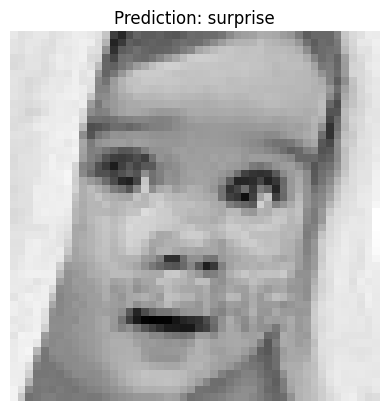

In [15]:
img_path = 'images/train/surprise/52.jpg'
print("Original image is of surprise")

img = ef(img_path)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("Model prediction is", pred_label)

# Display image
img_display = load_img(img_path, color_mode='grayscale')
plt.imshow(img_display, cmap='gray')
plt.title(f"Prediction: {pred_label}")
plt.axis('off')
plt.show()